# Machine Learning: validação de modelos

Treinaremos com 7500 elementos e testaremos com 2500 elementos


C:\Users\bruno\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


A acurácia foi 46.88%
A acurácia do dummy stratified foi 52.44%
A acurácia do Dummy Most Frequent foi 58.00%
Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%
Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 79.28%


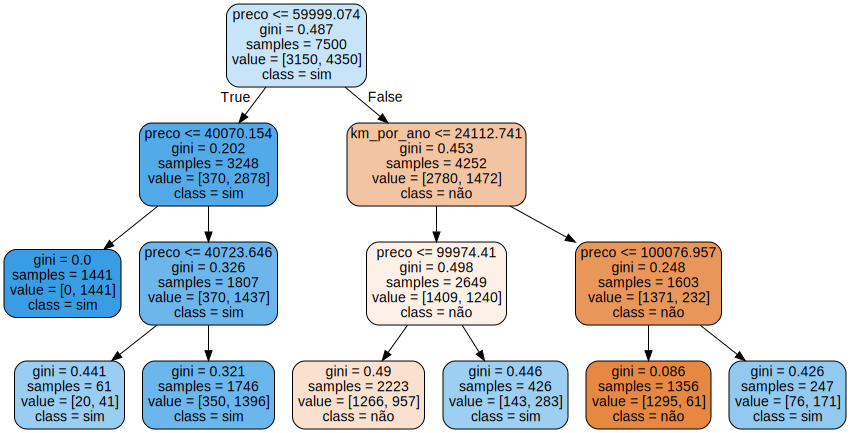

In [1]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()
dados.shape
a_renomear = {
    'mileage_per_year': 'milhas_por_ano',
    'model_year': 'ano_do_modelo',
    'price': 'preco',
    'sold': 'vendido'
}
dados = dados.rename(columns=a_renomear)
dados.head()
a_trocar = {
    'no': 0,
    'yes': 1
}

dados.vendido = dados.vendido.map(a_trocar)
dados.head()
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = (ano_atual - dados.ano_do_modelo)
dados.head()
dados['km_por_ano'] = (dados.milhas_por_ano * 1.60934)
dados.head()
dados = dados.drop(columns=['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'], axis=1)
dados.head()
x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25,
                                                        stratify=y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(treino_x, treino_y)

# usa o .score
acuracia = dummy_stratified.score(teste_x, teste_y) * 100
print("A acurácia do dummy stratified foi %.2f%%" % acuracia)
from sklearn.dummy import DummyClassifier

#aqui usaremos no DummyClassifier o "most frequent"

dummy_mostfrequent = DummyClassifier(strategy='most_frequent')
dummy_mostfrequent.fit(treino_x, treino_y)
acuracia = dummy_mostfrequent.score(teste_x, teste_y) * 100
print("A acurácia do Dummy Most Frequent foi %.2f%%" % acuracia)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25,
                                                                stratify=y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25,
                                                                stratify=y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

from sklearn.tree import export_graphviz

!pip install graphviz

import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None, feature_names=features,
                           filled=True, rounded=True,
                           class_names=['não', 'sim'])
grafico = graphviz.Source(dot_data)
grafico
### A decisão se a árvore será "quebrada" ou não depende do parâmetro "gini"


## 01. Validação cruzada e aleatoriedade inicial

### 06. Usando e avaliando com cross validate

In [2]:
# importando dados

import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"

dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)

In [3]:
#aqui dá só a média. queremos o intervalo

from sklearn.model_selection import cross_validate

SEED = 158020
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv=3, return_train_score=False)
results['test_score'].mean()

0.7578000751484867

In [4]:
# importando cross validate

#queremos um intervalo com 95% de confiança (media +- 2 desvios padroes)

from sklearn.model_selection import cross_validate

SEED = 158020
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv=3, return_train_score=False)
media = results['test_score'].mean()

desvio_padrao = results['test_score'].std()

print("Accuracy com cross validation, 3 = [%.2f, %.2f]" % (
    (media - 2 * desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 3 = [74.99, 76.57]


Ou seja: com 95% de confiança, a acurácia do modelo estará neste intervalo!

In [5]:
#usaremos "cv=10"

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv=10, return_train_score=False)
media = results['test_score'].mean()

desvio_padrao = results['test_score'].std()

print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % (
    (media - 2 * desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [74.24, 77.32]


In [6]:
#usaremos "cv=5"

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv=5, return_train_score=False)
media = results['test_score'].mean()

desvio_padrao = results['test_score'].std()

print("Accuracy com cross validation, 5 = [%.2f, %.2f]" % (
    (media - 2 * desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 5 = [75.21, 76.35]


Vale mencionar que o padrão do Sklearn para o cv é 5

## 02. KFold e aleatoriedade

### 02. KFold com aleatorização

In [7]:
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

cv = KFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv=cv, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std() * (desvio_padrao * 100)
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % (
    (media - 2 * desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [75.38, 76.18]


In [8]:
def imprime_resultados(results):
    media = results['test_score'].mean()
    desvio_padrao = results['test_score'].std()
    print("Accuracy médio: %.2f" % (media * 100))
    print("Accuracy intervalo: [%.2f, %.2f]" % ((media - 2 * desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

In [9]:
SEED = 301
np.random.seed(SEED)

cv = KFold(n_splits=10, shuffle=True)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv=cv, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 75.76
Accuracy intervalo: [73.26, 78.26]


## 03. Estratificação

### 02. Estratificação com validação cruzada

In [ ]:
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

cv = KFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv=cv, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std() * (desvio_padrao * 100)
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % (
    (media - 2 * desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

In [ ]:
def imprime_resultados(results):
    media = results['test_score'].mean()
    desvio_padrao = results['test_score'].std()
    print("Accuracy médio: %.2f" % (media * 100))
    print("Accuracy intervalo: [%.2f, %.2f]" % ((media - 2 * desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

In [ ]:
SEED = 301
np.random.seed(SEED)

cv = KFold(n_splits=10, shuffle=True)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv=cv, return_train_score=False)
imprime_resultados(results)

## 03. Estratificação

### 02. Estratificação com validação cruzada

In [ ]:
dados.sort_values("vendido", ascending=True)

In [ ]:
dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo", "km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

SEM SHUFFLE => BAIXA ACURÁCIA

In [ ]:
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

cv = KFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv=cv, return_train_score=False)
imprime_resultados(results)

COM SHUFFLE => ALTA ACURÁCIA

In [ ]:
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

cv = KFold(n_splits=10, shuffle=True)  # shuffle = True
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv=cv, return_train_score=False)
imprime_resultados(results)

In [ ]:
from sklearn.model_selection import StratifiedKFold

SEED = 301
np.random.seed(SEED)

cv = StratifiedKFold(n_splits=10, shuffle=True)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv=cv, return_train_score=False)
imprime_resultados(results)

## 04. Dados Agrupáveis

### 02. Gerando dados aleatórios

In [ ]:
np.random.seed(SEED)
np.random.randint(-2, 3, size=10000)

In [ ]:
np.random.seed(SEED)
dados['modelo_aleatorio'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.head()

In [ ]:
dados.modelo_aleatorio.unique()

In [ ]:
# para retirar o -1 e transformo-o em "1"

abs(dados.modelo_aleatorio.min())

In [ ]:
dados.modelo_aleatorio = dados.modelo_aleatorio + abs(dados.modelo_aleatorio.min()) + 1
dados.head()

In [ ]:
dados.modelo_aleatorio.unique()

In [ ]:
np.random.seed(SEED)
dados['modelo_aleatorio'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo_aleatorio = dados.modelo_aleatorio + abs(dados.modelo_aleatorio.min()) + 1
dados.head()

In [ ]:
dados['modelo'] = dados.modelo_aleatorio
dados.head()

In [ ]:
dados.drop(columns=['modelo_aleatorio'], inplace=True)

In [ ]:
dados.head()

### 03. Validação cruzada usando grupos

In [ ]:
from sklearn.model_selection import StratifiedKFold

SEED = 301
np.random.seed(SEED)

cv = StratifiedKFold(n_splits=10, shuffle=True)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv=cv, return_train_score=False)
imprime_resultados(results)

In [ ]:
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

cv = KFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv=cv, return_train_score=False)
imprime_resultados(results)

In [ ]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv=cv, groups=dados.modelo,
                         return_train_score=False)  #necessário por o parametro "groups"
imprime_resultados(results)

## 05. Pipeline de treino e validação

### 02. A importância do pipeline no crossvalidate

In [ ]:
np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

In [ ]:
#Testando validação crizada com GroupKFold

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv=cv, groups=dados.modelo, return_train_score=False)
imprime_resultados(results)

Cross validation com StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
scaler.fit(treino_x)
treino_x_escalado = scaler.transform(treino_x)
teste_x_escalado = scaler.transform(teste_x)

modelo = SVC()
modelo.fit(treino_x_escalado, treino_y)
previsoes = modelo.predict(teste_x_escalado)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi de %.2f%%" % acuracia)

In [ ]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits=10)
modelo = SVC()
results = cross_validate(modelo, x_azar, y_azar, cv=cv, groups=dados.modelo, return_train_score=False)
imprime_resultados(results)

In [ ]:
#necessário "escalar" o x_azar

scaler = StandardScaler()
scaler.fit(x_azar)
x_azar_escalado = scaler.transform(x_azar)

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits=10)
modelo = SVC()
results = cross_validate(modelo, x_azar_escalado, y_azar, cv=cv, groups=dados.modelo, return_train_score=False)
imprime_resultados(results)

In [ ]:
from sklearn.pipeline import Pipeline

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao', scaler), ('estimador', modelo)])

cv = GroupKFold(n_splits=10)

result = cross_validate(pipeline, x_azar, y_azar, cv=cv, groups=dados.modelo, return_train_score=False)

imprime_resultados(results)

In [10]:
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

cv = KFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv=cv, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std() * (desvio_padrao * 100)
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % (
    (media - 2 * desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [75.50, 76.06]


In [11]:
def imprime_resultados(results):
    media = results['test_score'].mean()
    desvio_padrao = results['test_score'].std()
    print("Accuracy médio: %.2f" % (media * 100))
    print("Accuracy intervalo: [%.2f, %.2f]" % ((media - 2 * desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

In [12]:
SEED = 301
np.random.seed(SEED)

cv = KFold(n_splits=10, shuffle=True)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x, y, cv=cv, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 75.76
Accuracy intervalo: [73.26, 78.26]


## 03. Estratificação

### 02. Estratificação com validação cruzada

In [13]:
dados.sort_values("vendido", ascending=True)

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704
...,...,...,...,...
5491,71910.43,1,9,25778.40812
1873,30456.53,1,6,15468.97608
1874,69342.41,1,11,16909.33538
5499,70520.39,1,16,19622.68262


In [14]:
dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo", "km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


SEM SHUFFLE => BAIXA ACURÁCIA

In [16]:
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

cv = KFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv=cv, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 57.84
Accuracy intervalo: [34.29, 81.39]


COM SHUFFLE => ALTA ACURÁCIA

In [17]:
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

cv = KFold(n_splits=10, shuffle=True)  # shuffle = True
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv=cv, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 75.78
Accuracy intervalo: [72.30, 79.26]


In [19]:
from sklearn.model_selection import StratifiedKFold

SEED = 301
np.random.seed(SEED)

cv = StratifiedKFold(n_splits=10, shuffle=True)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv=cv, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 75.78
Accuracy intervalo: [73.55, 78.01]


## 04. Dados Agrupáveis

### 02. Gerando dados aleatórios

In [20]:
np.random.seed(SEED)
np.random.randint(-2, 3, size=10000)

array([-2,  2,  0, ...,  0,  2,  2])

In [27]:
np.random.seed(SEED)
dados['modelo_aleatorio'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo_aleatorio
0,30941.02,1,18,35085.22134,16
1,40557.96,1,20,12622.05362,22
2,89627.50,0,12,11440.79806,12
3,95276.14,0,3,43167.32682,4
4,117384.68,1,4,12770.11290,3


In [28]:
dados.modelo_aleatorio.unique()

array([16, 22, 12,  4,  3, 11, 18, 17, 13,  0, 15, 10,  9, 14,  1,  5, 19,
       21,  8,  7, 20,  6,  2, -1], dtype=int64)

In [29]:
# para retirar o -1 e transformo-o em "1"

abs(dados.modelo_aleatorio.min())

1

In [30]:
dados.modelo_aleatorio = dados.modelo_aleatorio + abs(dados.modelo_aleatorio.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo_aleatorio
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [31]:
dados.modelo_aleatorio.unique()

array([18, 24, 14,  6,  5, 13, 20, 19, 15,  2, 17, 12, 11, 16,  3,  7, 21,
       23, 10,  9, 22,  8,  4,  1], dtype=int64)

In [32]:
np.random.seed(SEED)
dados['modelo_aleatorio'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo_aleatorio = dados.modelo_aleatorio + abs(dados.modelo_aleatorio.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo_aleatorio
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [33]:
dados['modelo'] = dados.modelo_aleatorio
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo_aleatorio,modelo
0,30941.02,1,18,35085.22134,18,18
1,40557.96,1,20,12622.05362,24,24
2,89627.50,0,12,11440.79806,14,14
3,95276.14,0,3,43167.32682,6,6
4,117384.68,1,4,12770.11290,5,5


In [34]:
dados.drop(columns=['modelo_aleatorio'], inplace=True)

In [35]:
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


### 03. Validação cruzada usando grupos

In [36]:
from sklearn.model_selection import StratifiedKFold

SEED = 301
np.random.seed(SEED)

cv = StratifiedKFold(n_splits=10, shuffle=True)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv=cv, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 75.78
Accuracy intervalo: [73.55, 78.01]


In [39]:
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

cv = KFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv=cv, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 57.84
Accuracy intervalo: [34.29, 81.39]


In [42]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv=cv, groups=dados.modelo,
                         return_train_score=False)  #necessário por o parametro "groups"
imprime_resultados(results)

Accuracy médio: 75.78
Accuracy intervalo: [73.67, 77.90]


## 05. Pipeline de treino e validação

### 02. A importância do pipeline no crossvalidate

In [46]:
np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [48]:
#Testando validação crizada com GroupKFold

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv=cv, groups=dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 75.78
Accuracy intervalo: [73.67, 77.90]


Cross validation com StandardScaler

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
scaler.fit(treino_x)
treino_x_escalado = scaler.transform(treino_x)
teste_x_escalado = scaler.transform(teste_x)

modelo = SVC()
modelo.fit(treino_x_escalado, treino_y)
previsoes = modelo.predict(teste_x_escalado)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi de %.2f%%" % acuracia)

A acurácia foi de 77.48%


In [51]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits=10)
modelo = SVC()
results = cross_validate(modelo, x_azar, y_azar, cv=cv, groups=dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 77.27
Accuracy intervalo: [74.35, 80.20]


In [52]:
#necessário "escalar" o x_azar

scaler = StandardScaler()
scaler.fit(x_azar)
x_azar_escalado = scaler.transform(x_azar)

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits=10)
modelo = SVC()
results = cross_validate(modelo, x_azar_escalado, y_azar, cv=cv, groups=dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 76.70
Accuracy intervalo: [74.30, 79.10]


In [54]:
from sklearn.pipeline import Pipeline

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao', scaler), ('estimador', modelo)])

cv = GroupKFold(n_splits=10)

result = cross_validate(pipeline, x_azar, y_azar, cv=cv, groups=dados.modelo, return_train_score=False)

imprime_resultados(results)

Accuracy médio: 76.70
Accuracy intervalo: [74.30, 79.10]
